In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 연습 1
mu=115
sigma=20
x=135
prob=stats.norm.cdf(x,mu,sigma)
print("{0}분 이상 걸리는 A/S 작업 비율 : {1:1f}%".format(x,(1-prob)*100))

135분 이상 걸리는 A/S 작업 비율 : 15.865525%


In [3]:
# 실습 1
Xvar=175
sd= 5
X=180
prob=stats.norm.cdf(Xvar,X,sd)
print("나의 키의 범위는 : {1:1f}%".format(x,(1-prob)*100))

나의 키의 범위는 : 84.134475%


In [4]:
# 연습 2
mu=12
sigma=3
x1=15
prob1=stats.norm.cdf(x1,mu,sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 : {2:.3f}%에 해당함".format(mu,x1,(prob1)-0.5))

12km 이상 15km 이하를 달릴 확률은 : 0.341%에 해당함


In [5]:
# 실습 2-1 
mu=12
sigma=3
x1=9
x2=15
prob1=stats.norm.cdf(x1,mu,sigma)
prob2=stats.norm.cdf(x2,mu,sigma)

print("{0}km 이상 {1}km 이하를 달릴 확률은 : {2:.3f}%에 해당함".format(x1,x2,prob2-prob1))

9km 이상 15km 이하를 달릴 확률은 : 0.683%에 해당함


In [6]:
# 실습 2-2 
mu=12
sigma=3
x1=15
prob=stats.norm.cdf(x1,mu,sigma)

print("{0}km 이상를 달릴 확률은 : {1:.3f}%에 해당함".format(x1,1-prob))

15km 이상를 달릴 확률은 : 0.159%에 해당함


In [7]:
# 연습 3 : t분포
t=1.53
df=5
prob=stats.t.cdf(t,df)
print("P(T<=t):{:.3f}".format(prob))

P(T<=t):0.907


In [8]:
# 실습 3 
t=2
df=100
prob=stats.t.cdf(t,df)
print("P(T<=t):{:.3f}".format(prob))

P(T<=t):0.976


In [9]:
# 연습 4
chisq=10
df=30
prob=stats.chi2.cdf(chisq,df)

print("P(X<{0}):{1:.4f}".format(chisq,prob))

P(X<10):0.0002


In [10]:
# 실습 4
chisq=3
df=8
prob=stats.chi2.cdf(chisq,df)

print("P(X<{0}):{1:.4f}".format(chisq,prob))

P(X<3):0.0656


In [11]:
# 연습 5 
f=2.0
dfnum=15
dfden=15

prob=stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.904


In [12]:
# 실습 5 
f=1.5
dfnum=10
dfden=100
prob=stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850


In [13]:
# 연습 6 
n=3
for i in range(n+1):
    prob=stats.binom.pmf(k=i,n=n, p=0.4)
    print("P=(X={0})={1:.3f}".format(i,prob))

P=(X=0)=0.216
P=(X=1)=0.432
P=(X=2)=0.288
P=(X=3)=0.064


In [14]:
# 실습 6
n=5
for i in range(n+1):
    prob=stats.binom.pmf(k=i,n=n, p=0.3)
    print("P=(X={0})={1:.3f}".format(i,prob))

P=(X=0)=0.168
P=(X=1)=0.360
P=(X=2)=0.309
P=(X=3)=0.132
P=(X=4)=0.028
P=(X=5)=0.002


In [15]:
# 연습 7

df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/camshaft.csv", encoding='euc-kr')
df.head()

statistic,p= stats.shapiro(df['Supp1'])
statistic,p
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test : statistic=0.9788166284561157, p-value=0.1074606254696846


In [16]:
# 실습 7

df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/2sample_t_test.csv", encoding='euc-kr')
df.head()
df=df.dropna()
statistic1,p1= stats.shapiro(df['Mat_A'])
statistic1,p1
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic1,p1))
statistic2,p2= stats.shapiro(df['Mat_B'])
statistic2,p2
print("Shapiro-Wilk Test : statistic={}, p-value={}".format(statistic2,p1))

Shapiro-Wilk Test : statistic=0.906264066696167, p-value=0.2563020884990692
Shapiro-Wilk Test : statistic=0.9729753732681274, p-value=0.2563020884990692


#### 정규성을 완벽하게 따른다

In [17]:
# 연습 8
df=pd.DataFrame({"sample":[3.6,2.9,2.8,2.6,3.4,3.2,2.2,2.6,2.6,2.4,2.4,2.6,3.4,2.4,2.1,2.6,3.0,2.4,2.7,2.4 ,2.6,2.9,2.9,2.0,2.7,2.2,2.8,2.7,1.8,2.5 ,3.0,3.2,2.8,2.6,3.2,3.1,2.9,2.7,2.7,2.2]})
lower,upper =stats.norm.interval(0.95,loc=np.mean(df),scale=0.397/np.sqrt(40))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([2.57][2.82])


In [18]:
# 실습 8
df=pd.DataFrame({"sample":[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
lower,upper =stats.norm.interval(0.95,loc=np.mean(df),scale=3.8/np.sqrt(20))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([17.83][21.17])


In [19]:
# 연습 9
df=pd.DataFrame({"sample":[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
lower,upper = stats.t.interval(0.95,len(df)-1, loc=np.mean(df),scale=stats.sem(df))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([54.39][55.33])


In [20]:
# 실습 9 
df=pd.DataFrame({"sample":[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]})
lower,upper = stats.t.interval(0.95,len(df)-1, loc=np.mean(df),scale=stats.sem(df))
print("신뢰구간:({0}{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6][72.4])


<Axes: >

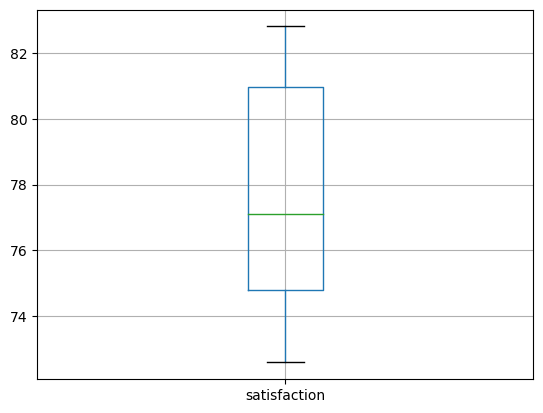

In [21]:
# 연습 10
df = pd.DataFrame({'satisfaction':[74.5,81.2,73.8,82,76.3,75.7,80.2,72.6,77.9,82.8]})
df.boxplot()

In [22]:
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={},p-value={}".format(statistic,p))

statistic=0.9331594705581665,p-value=0.4796782433986664


In [23]:
t_result=stats.ttest_1samp(df,76.7)

In [24]:
t,p= t_result.statistic.round(3),t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

1-Sample t-test
t 통계량 :[0.864]
pvalue:[0.41]


<Axes: >

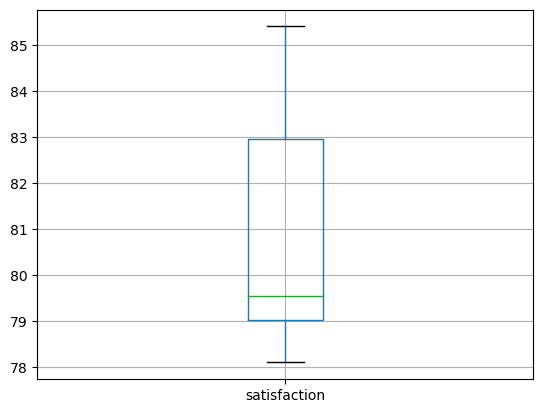

In [25]:
# 실습 10
df = pd.DataFrame({'satisfaction':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})
df.boxplot()

In [26]:
t_result=stats.ttest_1samp(df,78.0)
t,p= t_result.statistic.round(3),t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

1-Sample t-test
t 통계량 :[3.379]
pvalue:[0.008]


In [27]:
# 연습 11
df = pd.DataFrame({'A':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7],
                   'B':[7,6,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})
t_result= stats.ttest_ind(df['A'], df['B'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

2-Sample t-test
t 통계량 :-3.335
pvalue:0.002


In [28]:
# 실습 11 
df = pd.DataFrame({'A':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
                   'B':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.800]})
t_result= stats.ttest_ind(df['A'], df['B'])
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t 통계량 :{}".format(t))
print("pvalue:{}".format(p))

2-Sample t-test
t 통계량 :1.94
pvalue:0.073


In [29]:
# 연습 12
df1= pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2= pd.DataFrame({"after":[810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

t_result= stats.ttest_rel(df1,df2)
t,p= t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-5.324]
p:[0.]


In [30]:
# 실습 12
df1 = pd.DataFrame({'test_before':[720,589,780,648,720,589,780,648,780,648]})
df2= pd.DataFrame({"after":[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result= stats.ttest_rel(df1,df2)
t,p= t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


In [31]:
# 연습 13
count=15
n_obs=100
value=0.1

z,p=proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

1 Proportion test
z:1.400
p:0.161


In [32]:
count=150
n_obs=1000
value=0.1

z,p=proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

#표본 수가 적으면 차이가 없다고 나왔던 것들이 표본 수가 많으면 차이가 있는 것으로 나올 수 있다. 

1 Proportion test
z:4.428
p:0.000


In [33]:
# 실습 13
count=40
n_obs=100
value=0.5

z,p=proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

1 Proportion test
z:-2.041
p:0.041


In [34]:
count=400
n_obs=1000
value=0.5

z,p=proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

#표본 수가 적으면 차이가 없다고 나왔던 것들이 표본 수가 많으면 차이가 있는 것으로 나올 수 있다. 

1 Proportion test
z:-6.455
p:0.000


In [35]:
# 연습 14
count=np.array([4,1])
nobs=np.array([1000,1200])
z,p= proportions_ztest(count,nobs)

print("2 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

2 Proportion test
z:1.553
p:0.120


In [36]:
# 실습 14
count=np.array([14,5])
nobs=np.array([1200,1200])
z,p= proportions_ztest(count,nobs)

print("2 Proportion test")
print('z:{0:0.3f}'.format(z))
print('p:{0:0.3f}'.format(p))

2 Proportion test
z:2.073
p:0.038


In [37]:
# 연습 15
df = pd.DataFrame({'Work_1':[270,228,277],'Work_2':[260,285,284],'Work_3':[236,225,231],'Work_4':[234,262,208]})
chi, pval, dof, expected = stats.chi2_contingency(df)
print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq:13.366
p:0.038
degree pf freedom:6
expected value:
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


In [38]:
# 실습 15
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,2,3,2,7,3],
                   'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})
chi, pval, dof, expected = stats.chi2_contingency(df)
print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq:90.432
p:0.000
degree pf freedom:30
expected value:
[[11.403  8.507  3.982  3.982  1.991 10.136]
 [ 8.837  6.593  3.086  3.086  1.543  7.855]
 [10.548  7.869  3.683  3.683  1.842  9.376]
 [ 8.267  6.167  2.887  2.887  1.443  7.348]
 [ 6.271  4.679  2.19   2.19   1.095  5.575]
 [ 9.692  7.231  3.385  3.385  1.692  8.615]
 [ 7.982  5.955  2.787  2.787  1.394  7.095]]


In [39]:
# 연습 16
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                   'B':[721,821,910,678,723,790,711,790,745,891],
                   'C':[750,915,888,721,894,834,841,912,845,889]})

<Axes: >

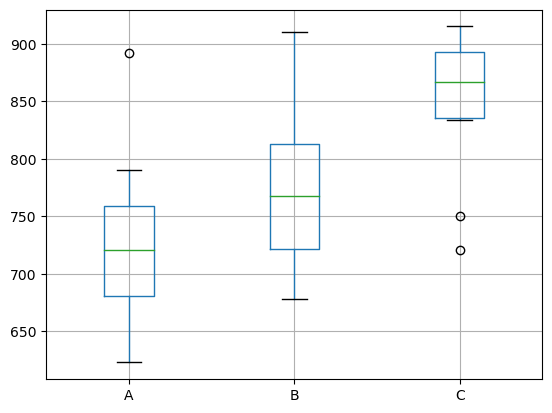

In [40]:
df.boxplot(['A','B','C'])

In [41]:
statistic,p= stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9293239712715149, p-value=0.4412756860256195


In [42]:
statistic,p= stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.924264669418335, p-value=0.39389991760253906


In [43]:
statistic,p= stats.shapiro(df['C'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8571338057518005, p-value=0.07058726251125336


In [44]:
stats.bartlett(df['A'],df['B'],df['C'])

BartlettResult(statistic=0.21704722611091523, pvalue=0.8971577099320932)

In [45]:
f_result=stats.f_oneway(df['A'],df['B'],df['C'])
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:6.884
p-value:0.004


In [143]:
# 실습 16
df=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/ANOVA.csv", encoding='euc-kr')
df[["time","gangjong"]]

df= pd.DataFrame({'a':[32.2,30.4,33.6,36.4,33.9,34.9],
                   'b':[33.1,29.9,31.7,27.5,34.0,30.7],
                   'c':[32.6,32.7,29.3,25.9,31.1,23.8],
                   'd':[26.7,28.5,30.9,26.2,32.3,23.7]})

In [144]:
statistic,p= stats.shapiro(df['a'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9879403114318848, p-value=0.983557939529419


In [145]:
statistic,p= stats.shapiro(df['b'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9769707918167114, p-value=0.9355478286743164


In [146]:
statistic,p= stats.shapiro(df['c'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8929420113563538, p-value=0.3338908553123474


In [147]:
statistic,p= stats.shapiro(df['d'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9713904857635498, p-value=0.901641845703125


In [155]:
stats.bartlett(df['a'],df['b'],df['c'],df['d'])

BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)

In [148]:
f_result=stats.f_oneway(df['a'],df['b'],df['c'],df['d'])
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:4.172
p-value:0.019


In [149]:
# 연습 17
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr,pval=stats.pearsonr(df1,df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:0.989
p-value:0.000


In [154]:
# 실습 17
df1= [37.6,38.6,37.2,36.4,38.6,39.0,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39.0,36.9,36.8,37.6,33.0,33.5]
df2= [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]
corr,pval=stats.pearsonr(df1,df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000
